## CARREGANDO O DATASET

In [65]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split


data =  load_breast_cancer(as_frame=True)
df = data.frame

print(df.info())
print(df.head())          





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##  DEFININDO  X e Y  (Atributos e variavel alvo cada uma)

In [66]:
X = df.drop(columns=[data.target.name])
Y = df[data.target.name]

print(X)


     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


## SEPARAR TREINOS E TESTES

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size= 0.2, random_state=42, stratify=Y)

print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


## CRIAÇÃO DE MODELO PARA CLASSIFICAÇÃO

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression


modelos = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=10000)
}

## TREINANDO MODELOS

In [69]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

resultados = {}

for nome, modelo in modelos.items():
    modelo.fit(X_train, Y_train)
    Y_predict = modelo.predict(X_test)

    acuraria = accuracy_score(Y_test, Y_predict)
    precisao = precision_score(Y_test, Y_predict, average='weighted')
    matriz_confusao = confusion_matrix(Y_test, Y_predict)

    resultados[nome] = {
        "Acurácia": acuraria,
        "Precisão": precisao,
        "Matriz de Confusão": matriz_confusao
    }

    print (f'{nome}: - Acurácia: {acuraria:.5f}, Precisão: {precisao:.5f}')
    print(f'Precisao:{precisao:.5f}')
    print('Matriz de Confusão:')
    print(matriz_confusao)  
    print('\n\n\n', classification_report(Y_test, Y_predict))

Decision Tree: - Acurácia: 0.91228, Precisão: 0.91367
Precisao:0.91367
Matriz de Confusão:
[[38  4]
 [ 6 66]]



               precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

KNN: - Acurácia: 0.91228, Precisão: 0.91367
Precisao:0.91367
Matriz de Confusão:
[[38  4]
 [ 6 66]]



               precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Logistic Regression: - Acurácia: 0.96491, Precisão: 0.96518
Precisao:0.96518
Matriz de Confusão:
[[39  3]
 [ 1 71]]



         

## GRAFICOS


C:\Users\user\AppData\Local\Temp\ipykernel_10548\638961479.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette=["#d80000", "#000000", "#888686"])


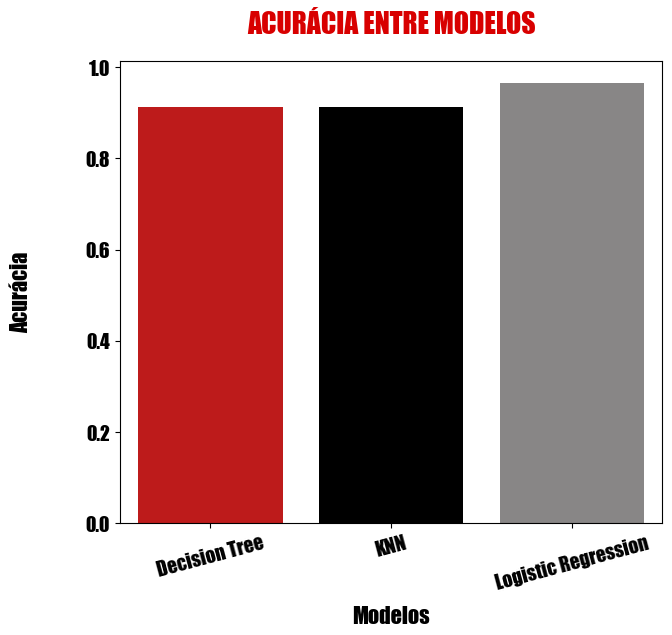

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = "Impact"

model_names = list(resultados.keys())
accuracies = [resultados[name]['Acurácia'] for name in model_names]

plt.figure(figsize=(7,6))
sns.barplot(x=model_names, y=accuracies, palette=["#d80000", "#000000", "#888686"])

plt.title('ACURÁCIA ENTRE MODELOS',
          fontsize=20, fontweight='bold', color="#d80000", pad=20)

plt.xlabel('Modelos', fontsize=16, fontweight='bold', color="#000000", labelpad=10)
plt.ylabel('Acurácia', fontsize=16, fontweight='bold', color="#000000", labelpad=40)

plt.xticks(rotation=15, fontsize=14, fontweight='bold', color="#000000")
plt.yticks(fontsize=14, color="#000000")

plt.show()